## Initialize session

In [ ]:
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr

In [ ]:
session = WolframLanguageSession()

In [ ]:
session.evaluate(wlexpr("{$InstallationDirectory, $Version}"))

In [ ]:
session.start()

In [ ]:
session.started

## Generating Wolfram Language™ code


### Construct Wolfram Langauge input using Python syntax

In [ ]:
from wolframclient.language import wl, wlexpr
x = wl.Select(wl.Range(10), wl.PrimeQ)
y = wl.Reverse(wl.Range(10))
z = wl.Now
print(x)
print(y)

The syntax of WL functions must be modified to work with python. For example:

Function[arg1, arg2, Option->OptionValue] becomes wl.Function(arg1, arg2, Option=OptionValue).

### Construct Wolfram Langauge expressions using wlexpr strings

In [ ]:
wl.Map(wlexpr('#^2&'), [1,2,3])

## Evaluating Wolfram Language code

Wolfram expressions generated inside Python will not evaluate unless called explicitly. One way to achieve this is with local kernel evaluation, which utilises the wolfram kernel licences contained within a Wolfram product installation such as Mathematica™. This is achieved with **session.evaluate** imported from the **WolframLanguageSession** library:

In [ ]:
r = wl.Total(wl.Table(wl.i,[wl.i,20,30]))

In [ ]:
session.evaluate(r)

In [ ]:
session.evaluate(wl.Integrate(wl.x, wl.x))

**Data Conversion**

As shown above, some simple data types (lists, integers) are automatically converted into Python formats. Others, such as DateObject and Graphic, will remain as WL expression types and will need to be serialised (see section 2), manually converted or exported/rendered:

In [40]:
data = [.3, 2, 4, 5, 5.5]
graphic = wl.BarChart(data, ChartLabels=["a", "b", "c", "d", "e"])
path = "/tmp/barchart1.png"
png_export = wl.Export(path, graphic, "PNG")
session.evaluate(png_export)

'/tmp/barchart1.png'

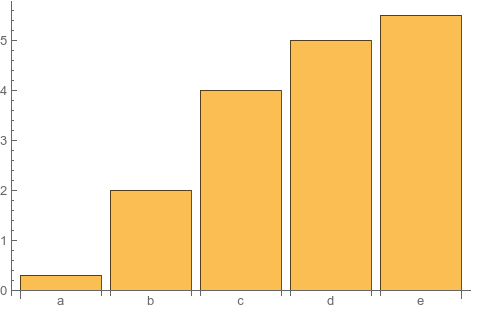

In [41]:
from PIL import Image
barchartImage = Image.open('/tmp/barchart1.png')
barchartImage

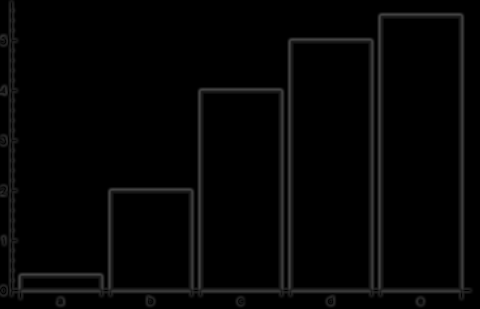

In [42]:
png_export2 = wl.Export("/tmp/barchart2.png", wl.GradientFilter(barchartImage, 3), "PNG")
session.evaluate(png_export2)
Image.open('/tmp/barchart2.png')